In [113]:
# Importing library
# Adding Preliminary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
#Reading the dataset
data = pd.read_csv(r'C:\Users\suluv\Downloads\Wine_clust.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [115]:
data.shape

(178, 13)

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [117]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [118]:
#Importing Dataset
#To demonstrate various clustering algorithms in python, the Wine dataset will be used which has three classes in the dependent 
#variable and using this dataset clusters will be formed.

from sklearn import datasets
wine = datasets.load_wine()
data = pd.DataFrame(data)
data.columns = wine.feature_names
data['Type']=wine.target
data.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Type
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [119]:
#Preparing Data
#Here we have the target variable ‘Type’. We need to remove the target variable so that this dataset can be used to work in an unsupervised learning environment. The iloc function is used to get the features we require. We also use .values function to get an array of the dataset.
#(Note that we transformed the dataset to an array so that we can plot the graphs of the clusters).

data_X = data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]].values

In [120]:
# Now we will separate the target variable from the original dataset and again convert it to an array by using numpy.

data_Y = data['Type']
data_Y = np.array(data_Y)

## Wine dataset clustering plot

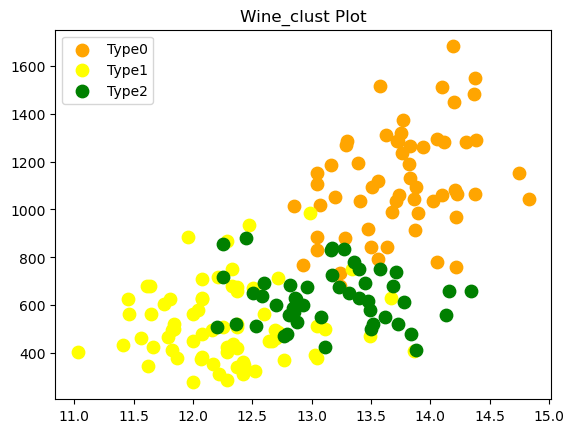

In [121]:
# Visualise Classes
#In this Wine dataset, we have three classes. We visualise these classes in a 2-D graph.

plt.scatter(data_X[data_Y == 0, 0], data_X[data_Y == 0, 12], s = 80, c = 'orange', label = 'Type0')
plt.scatter(data_X[data_Y == 1, 0], data_X[data_Y == 1, 12], s = 80, c = 'yellow', label = 'Type1')
plt.scatter(data_X[data_Y == 2, 0], data_X[data_Y == 2, 12], s = 80, c = 'green', label = 'Type2')


plt.title("Wine_clust Plot")
plt.legend()


## K Means Clustering 

In [122]:
from sklearn.cluster import KMeans

In [123]:
#Finding the optimum no of clusters
wcss = []
for i in range(1,13):
    kmeans = KMeans(n_clusters = i ,init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

C:\Users\suluv\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [124]:
wcss

[17592402.70373319,
 4543801.220149009,
 2370742.3045900567,
 1337084.3129141051,
 916424.194313911,
 647371.0045564491,
 412348.4505156595,
 323268.0191572384,
 270999.3902503476,
 217931.82241228034,
 186427.0031923028,
 166289.85647777576]

## Elbow plot

<function matplotlib.pyplot.show(close=None, block=None)>

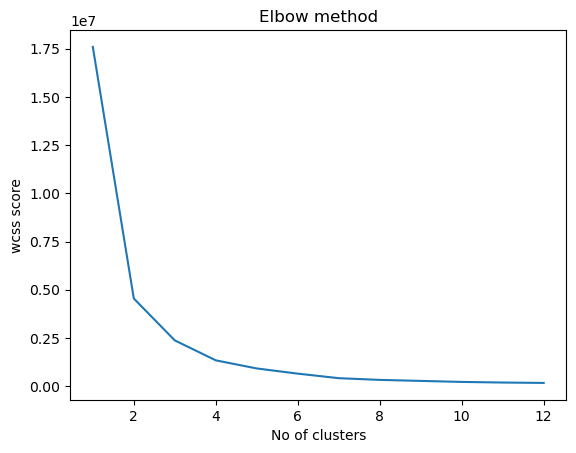

In [125]:
plt.plot(range(1,13),wcss)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('wcss score')
plt.show

#### from elbow method optimum no of clusters = 5

In [126]:
#kmeans
kmeans = KMeans(n_clusters = 5 ,init = 'k-means++',random_state = 42)
y_kmeans = kmeans.fit_predict(data)
y_kmeans

array([4, 4, 4, 1, 0, 1, 1, 1, 4, 4, 1, 1, 1, 4, 1, 1, 1, 4, 1, 0, 0, 0,
       4, 4, 0, 0, 4, 1, 0, 4, 1, 1, 4, 1, 4, 0, 0, 4, 4, 0, 0, 4, 4, 3,
       0, 4, 4, 4, 4, 1, 4, 1, 4, 1, 4, 4, 4, 1, 1, 2, 3, 2, 3, 2, 2, 3,
       2, 2, 0, 3, 0, 2, 2, 4, 0, 2, 2, 2, 0, 2, 2, 3, 3, 2, 2, 2, 2, 3,
       3, 3, 2, 2, 2, 2, 2, 0, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 3,
       3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 0, 2, 3, 0, 0, 2, 3, 3, 3, 2, 2, 2, 3,
       3, 3, 2, 0, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 0, 3, 2, 2, 3, 0, 0, 0,
       0, 3])

In [127]:
print(y_kmeans)

[4 4 4 1 0 1 1 1 4 4 1 1 1 4 1 1 1 4 1 0 0 0 4 4 0 0 4 1 0 4 1 1 4 1 4 0 0
 4 4 0 0 4 4 3 0 4 4 4 4 1 4 1 4 1 4 4 4 1 1 2 3 2 3 2 2 3 2 2 0 3 0 2 2 4
 0 2 2 2 0 2 2 3 3 2 2 2 2 3 3 3 2 2 2 2 2 0 3 2 3 2 3 3 2 2 3 2 2 2 2 3 3
 2 3 2 2 2 2 2 2 3 3 2 2 2 2 2 2 2 2 3 3 2 3 3 3 3 3 2 3 3 3 0 2 3 0 0 2 3
 3 3 2 2 2 3 3 3 2 0 3 3 2 3 3 3 3 2 3 3 0 3 2 2 3 0 0 0 0 3]


## Kmeans Clustering plot

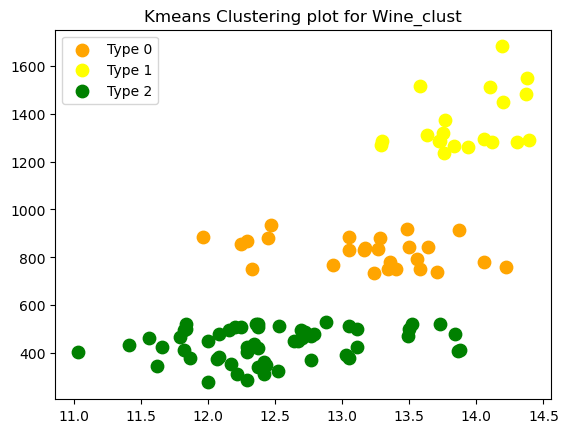

In [128]:
# Visualizing Output
# In the above output we got value labels: ‘0’, ‘1’  and ‘2’. For a better understanding, we can visualize these clusters.

plt.scatter(data_X[y_kmeans == 0, 0], data_X[y_kmeans == 0, 12], s = 80, c = 'orange', label = 'Type 0')
plt.scatter(data_X[y_kmeans == 1, 0], data_X[y_kmeans == 1, 12], s = 80, c = 'yellow', label = 'Type 1')
plt.scatter(data_X[y_kmeans == 2, 0], data_X[y_kmeans == 2, 12], s = 80, c = 'green', label = 'Type 2')


plt.title('Kmeans Clustering plot for Wine_clust')
plt.legend()

### KMeans-Silhouette score

In [129]:
from sklearn.metrics import silhouette_score
silhouette_sc = silhouette_score(data,y_kmeans)
print(silhouette_sc)

0.548969124044004


### Using Dendrogram finding optimum no of clusters

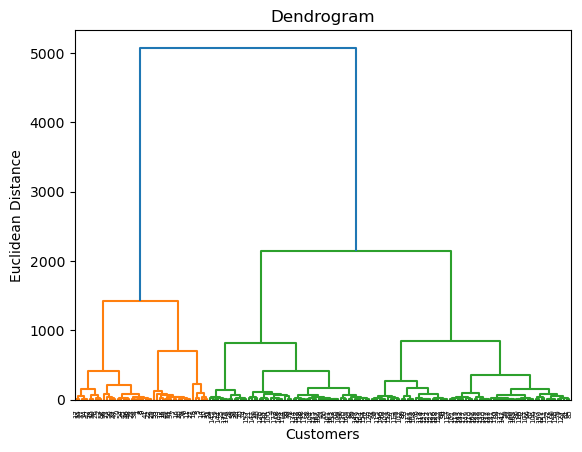

In [130]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data,method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

## Agglomerative Clustering

In [131]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2,affinity ='euclidean',linkage='ward')
y_hc = hc.fit_predict(data)
y_hc

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

### Agglomerative-Silhouette score

In [132]:
silhouette_avg = silhouette_score(data,y_hc)
print(silhouette_avg)

0.6587247821404869


## Agglomerative Hierarchy Clustering

In [133]:
hc1 = AgglomerativeClustering(n_clusters = 3,affinity ='euclidean',linkage='ward')
y_hc1 = hc1.fit_predict(data)
y_hc1

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1], dtype=int64)

### HC-Silhouette score

In [134]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data,y_hc1)
print(silhouette_avg)

0.5644632902637768


## DBSCAN clustering algorithm
#DBSCAN stands for density-based spatial clustering of applications with noise.

In [154]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data)
distances, indices = nbrs.kneighbors(data)


In [155]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [ ]:
db = DBSCAN(eps=40,min_samples=5).fit(data)
labels = db.labels
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
silhouette_avg = silhouettescore(data,db.labels)
print(silhouette_avg)